In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor #for decision tree
from sklearn.naive_bayes import GaussianNB     #for naive bayes
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("../input"))


['melb_data.csv']


In [2]:
df = pd.read_csv('../input/melb_data.csv')
print(df.iloc[3])
print(df.isnull().sum())

Unnamed: 0                           5
Suburb                      Abbotsford
Address               40 Federation La
Rooms                                3
Type                                 h
Price                           850000
Method                              PI
SellerG                         Biggin
Date                         4/03/2017
Distance                           2.5
Postcode                          3067
Bedroom2                             3
Bathroom                             2
Car                                  1
Landsize                            94
BuildingArea                       NaN
YearBuilt                          NaN
CouncilArea                      Yarra
Lattitude                     -37.7969
Longtitude                     144.997
Regionname       Northern Metropolitan
Propertycount                     4019
Name: 3, dtype: object
Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Pric

In [3]:
features = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','Price']
df = df[features]        #we are throw away the nan values 
df = df.dropna(axis=0)   #cause alghoritms not working when you have nan value 
                         #it's actually drop the hole line 

**WE ARE DIVIDING OUR DATA FOR TRAINING AND TESTING**

**Traning:**
First we will train our model, for this we will give features and results 
So our model can say the results looking by the features
We will take 10.000 lines for training

**Testing:**
In here we will give only features and we will take results
Than we will compare results to real price of data 

In [4]:
traning_df = df[:10000]     #we will use this data for traning our model 
testing_df = df[10000:]     #and this is for testing


y = traning_df.Price       #Price of houses 
features_x = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize']
x = traning_df[features_x] #and features of houses

In [5]:
model_melb = GaussianNB()
model_melb.fit(x,y)       #we are giving features and results for training

GaussianNB(priors=None, var_smoothing=1e-09)

In [6]:
testing_df_x = testing_df[features_x] #we are taking only house features cause we want to find prices 
                                      #using by our model
predict = model_melb.predict(testing_df_x)#giving features and here our predict for house price as a list
predict = pd.DataFrame(predict)           #now we make a dataframe

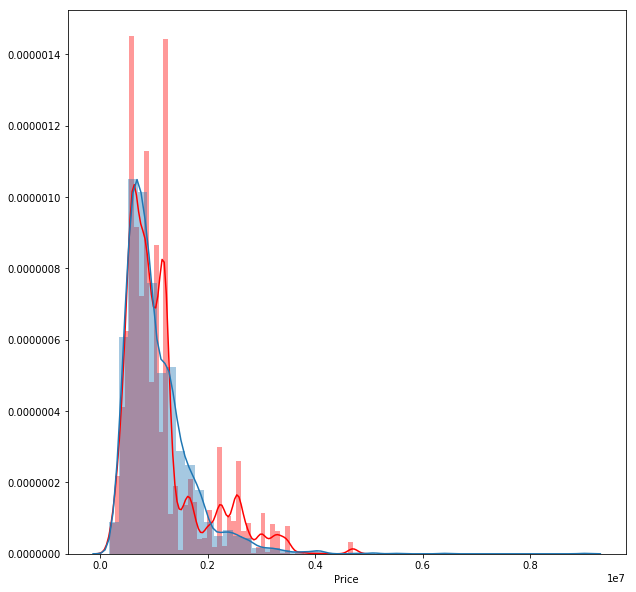

In [7]:
plt.figure(figsize=(10,10))        
sns.distplot(predict,color='red')
sns.distplot(testing_df.Price)
plt.show()

**NAIVE BAYES:**
*Reds are our model predict blues are real price of house.It's looking good so smilar with real prices. We will try to make it better.*

**Let's try decision tree model**

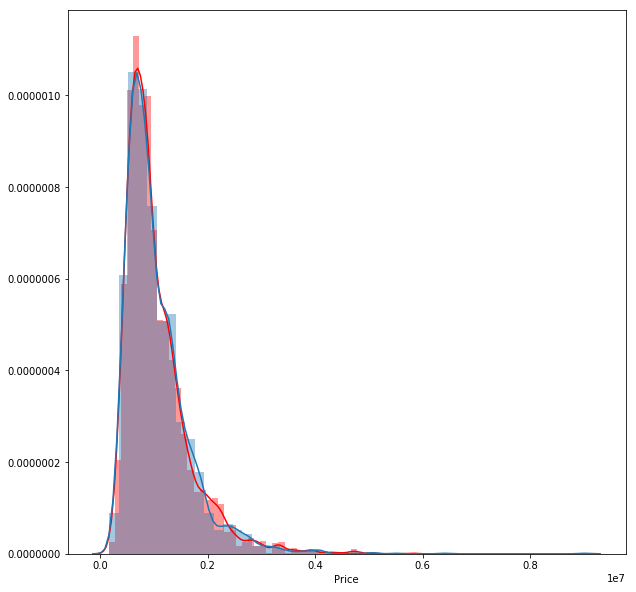

In [8]:
model_melb = DecisionTreeRegressor(random_state=1)
model_melb.fit(x,y)


testing_df_x = testing_df[features_x] #we are taking only house features cause we want to find prices 
                                      #using by our model
predict = model_melb.predict(testing_df_x)#giving features and here our predict for house price as a list
predict = pd.DataFrame(predict)

plt.figure(figsize=(10,10))        
sns.distplot(predict,color='red')
sns.distplot(testing_df.Price)
plt.show()



**Decision Tree:**
*looking better than naive bayes actually it's looking great. I wasn't expect that but let's play more maybe we can take better results*

**After this I will use decision tree model for better results**

**Now lets use more features it can give better results**

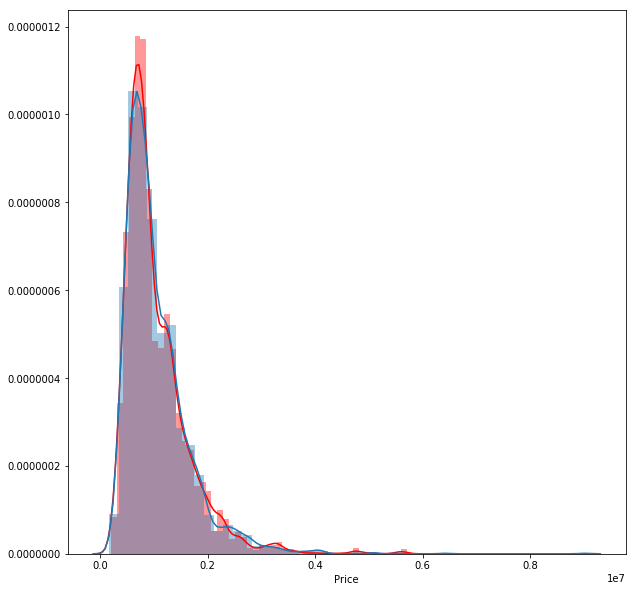

In [9]:
df = pd.read_csv('../input/melb_data.csv')

id=0
for suburb in df.Suburb.unique():         #for using suburb we have to give every unique string to id
    df['Suburb'][df['Suburb']==suburb]=id
    id+=1
    #now we can use suburb for our model


#################################################################################################
features = ['Suburb','Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','Lattitude','Longtitude','Price']
df = df[features]
df = df.dropna(axis=0)

###########################################################################################
traning_df = df[:10000]
testing_df = df[10000:]

y = traning_df.Price  

features_x = ['Suburb','Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','Lattitude','Longtitude']
x = traning_df[features_x]


#################################################################################################
model_melb = DecisionTreeRegressor(random_state=1)
model_melb.fit(x,y)

##################################################################################################
testing_df_x = testing_df[features_x]
predict = model_melb.predict(testing_df_x)
predict = pd.DataFrame(predict)

#################################################################################################
plt.figure(figsize=(10,10))
sns.distplot(predict,color='red')
sns.distplot(testing_df.Price)
plt.show()

**With more features:**
*It's not better than before why I don't know I thought it will give better results when we use more values for traning. 
Lets keep going*

**NOW WE WILL DETECT OUTLIERS**

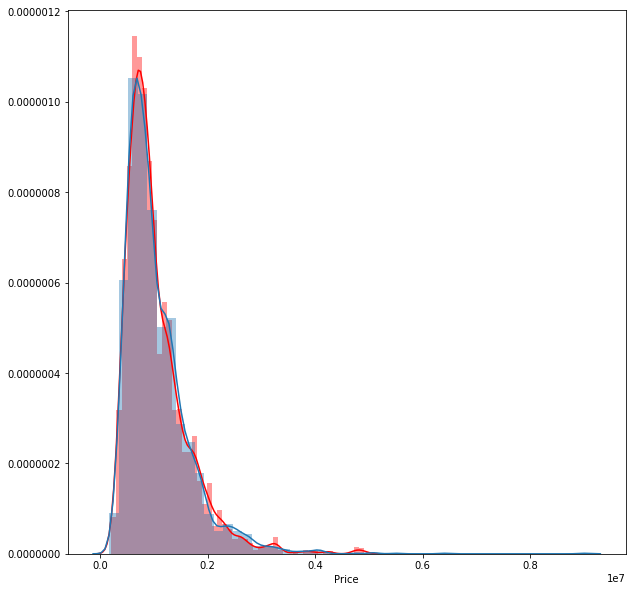

In [10]:
df = pd.read_csv('../input/melb_data.csv')

id=0
for suburb in df.Suburb.unique():     
    df['Suburb'][df['Suburb']==suburb]=id
    id+=1
    


#################################################################################################
features = ['Suburb','Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','Lattitude','Longtitude','Price']
df = df[features]
df = df.dropna(axis=0)

###########################################################################################
traning_df = df[:10000]
testing_df = df[10000:]


def find_outlier(x):        #here we finding outliers
    q1 = np.percentile(x, 5)   #those numbers after x they are control the limit 
    q3 = np.percentile(x, 95)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling= q3 + 1.5*iqr
    outlier_indices = list(x.index[(x<floor)|(x>ceiling)])
    outlier_values = list(x[(x<floor)|(x>ceiling)])
    return outlier_indices, outlier_values   #it's returning two array index and values

for columns in features:
    outlier_traning_df = np.sort(find_outlier(traning_df[columns]))
    #print(outlier_tranin_df)  if you want you can print outliers and you can take a look
    traning_df = traning_df.drop(outlier_traning_df[0])
    

y = traning_df.Price

features_x = ['Suburb','Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','Lattitude','Longtitude']
x = traning_df[features_x]


#################################################################################################
model_melb = DecisionTreeRegressor(random_state=1)
model_melb.fit(x,y)

##################################################################################################
testing_df_x = testing_df[features_x]
predict = model_melb.predict(testing_df_x)
predict = pd.DataFrame(predict)

#################################################################################################
plt.figure(figsize=(10,10))
sns.distplot(predict,color='red')
sns.distplot(testing_df.Price)
plt.show()

**OUTLIERS:**
*Outliers are like the corners of our data*
*If we make it more between limits we might cute more corners and sometimes it's not good cause we can lose lots of line *

*It's give better results than one step before.*

*Now average place better cause of corners(I mean the highest point of figure)*

**ALSO HERE WE SEND EVERY FEATURES TO OUTLIER DEF **

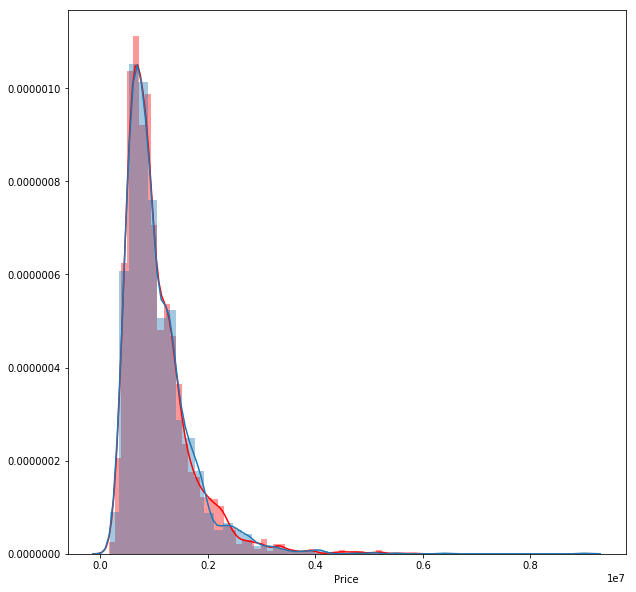

In [11]:
df = pd.read_csv('../input/melb_data.csv')

#################################################################################################
features = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','Price']
df = df[features]
df = df.dropna(axis=0)

###########################################################################################
traning_df = df[:10000]
testing_df = df[10000:]


def find_outlier(x):        #here we finding outliers
    q1 = np.percentile(x, 3)   #those numbers after x they are control the limit 
    q3 = np.percentile(x, 97)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling= q3 + 1.5*iqr
    outlier_indices = list(x.index[(x<floor)|(x>ceiling)])
    outlier_values = list(x[(x<floor)|(x>ceiling)])
    return outlier_indices, outlier_values   #it's returning two array index and values


outlier_traning_df = np.sort(find_outlier(traning_df['Price']))#HERE WE SENDING ONLY ONE FEATURE
traning_df = traning_df.drop(outlier_traning_df[0])
    

y = traning_df.Price

features_x = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize']
x = traning_df[features_x]


#################################################################################################
model_melb = DecisionTreeRegressor(random_state=1)
model_melb.fit(x,y)

##################################################################################################
testing_df_x = testing_df[features_x]
predict = model_melb.predict(testing_df_x)
predict = pd.DataFrame(predict)

#################################################################################################
plt.figure(figsize=(10,10))
sns.distplot(predict,color='red')
sns.distplot(testing_df.Price)
plt.show()

**RESULTS:**

*It's mean giving every feature to model not work we should we give the right features to models*

*It's also same for outlier fucntion we should give right features*